### Import of packages 

In [52]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import pickle

In [53]:
### Getting fermilar with the data 


In [54]:
data = pd.read_csv("Data\AP001.csv")
df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59150 entries, 0 to 59149
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   From Date        59150 non-null  object 
 1   To Date          59150 non-null  object 
 2   PM2.5 (ug/m3)    54323 non-null  float64
 3   PM10 (ug/m3)     54450 non-null  float64
 4   NO (ug/m3)       55153 non-null  float64
 5   NO2 (ug/m3)      55100 non-null  float64
 6   NOx (ppb)        55315 non-null  float64
 7   NH3 (ug/m3)      53564 non-null  float64
 8   SO2 (ug/m3)      54285 non-null  float64
 9   CO (mg/m3)       54673 non-null  float64
 10  Ozone (ug/m3)    54567 non-null  float64
 11  Benzene (ug/m3)  55213 non-null  float64
 12  Toluene (ug/m3)  55213 non-null  float64
 13  Temp (degree C)  55113 non-null  float64
 14  RH (%)           55281 non-null  float64
 15  WS (m/s)         55299 non-null  float64
 16  WD (deg)         54656 non-null  float64
 17  SR (W/mt2)  

In [55]:
df.head()

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3),Temp (degree C),RH (%),WS (m/s),WD (deg),SR (W/mt2),BP (mmHg),VWS (m/s),Xylene (ug/m3),RF (mm),AT (degree C)
0,2016-07-01 10:00:00,2016-07-01 11:00:00,10.67,39.0,17.67,39.2,32.33,7.07,6.60,0.48,14.5,1.0,4.63,33.43,71.67,2.30,226.33,123.67,NaN,-0.1,0.1,0.0,23.05
1,2016-07-01 11:00:00,2016-07-01 12:00:00,2.00,39.0,20.50,41.9,35.80,7.40,NaN,0.49,15.0,0.7,4.50,33.70,70.00,2.50,223.00,186.00,NaN,-0.1,0.1,0.0,NaN
2,2016-07-01 12:00:00,2016-07-01 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-07-01 13:00:00,2016-07-01 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-07-01 14:00:00,2016-07-01 15:00:00,20.50,50.0,15.40,43.6,32.78,6.35,6.38,0.47,10.5,0.6,4.50,33.57,63.50,1.88,223.00,240.50,NaN,-0.1,0.1,0.0,NaN


Dublicating the data 

In [56]:
dfc = df.copy()
pd.set_option("display.max_columns", None)
dfc.head()

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3),Temp (degree C),RH (%),WS (m/s),WD (deg),SR (W/mt2),BP (mmHg),VWS (m/s),Xylene (ug/m3),RF (mm),AT (degree C)
0,2016-07-01 10:00:00,2016-07-01 11:00:00,10.67,39.0,17.67,39.2,32.33,7.07,6.60,0.48,14.5,1.0,4.63,33.43,71.67,2.30,226.33,123.67,NaN,-0.1,0.1,0.0,23.05
1,2016-07-01 11:00:00,2016-07-01 12:00:00,2.00,39.0,20.50,41.9,35.80,7.40,NaN,0.49,15.0,0.7,4.50,33.70,70.00,2.50,223.00,186.00,NaN,-0.1,0.1,0.0,NaN
2,2016-07-01 12:00:00,2016-07-01 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-07-01 13:00:00,2016-07-01 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-07-01 14:00:00,2016-07-01 15:00:00,20.50,50.0,15.40,43.6,32.78,6.35,6.38,0.47,10.5,0.6,4.50,33.57,63.50,1.88,223.00,240.50,NaN,-0.1,0.1,0.0,NaN


Remove Space from Table Headers

In [57]:
dfc.columns = dfc.columns.str.replace(' ', '')

Remove Uneccessary Columns

In [58]:
dfc = dfc.drop(columns = ["WS(m/s)", "WD(deg)", "SR(W/mt2)", "VWS(m/s)",	"Xylene(ug/m3)",	"RF(mm)", "AT(degreeC)", "BP(mmHg)"], index = 1)

In [59]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59149 entries, 0 to 59149
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FromDate        59149 non-null  object 
 1   ToDate          59149 non-null  object 
 2   PM2.5(ug/m3)    54322 non-null  float64
 3   PM10(ug/m3)     54449 non-null  float64
 4   NO(ug/m3)       55152 non-null  float64
 5   NO2(ug/m3)      55099 non-null  float64
 6   NOx(ppb)        55314 non-null  float64
 7   NH3(ug/m3)      53563 non-null  float64
 8   SO2(ug/m3)      54285 non-null  float64
 9   CO(mg/m3)       54672 non-null  float64
 10  Ozone(ug/m3)    54566 non-null  float64
 11  Benzene(ug/m3)  55212 non-null  float64
 12  Toluene(ug/m3)  55212 non-null  float64
 13  Temp(degreeC)   55112 non-null  float64
 14  RH(%)           55280 non-null  float64
dtypes: float64(13), object(2)
memory usage: 7.2+ MB


Doing justics to Null Values 

In [60]:
dfc.isna().sum()/len(dfc) * 100

FromDate          0.000000
ToDate            0.000000
PM2.5(ug/m3)      8.160747
PM10(ug/m3)       7.946035
NO(ug/m3)         6.757511
NO2(ug/m3)        6.847115
NOx(ppb)          6.483626
NH3(ug/m3)        9.443947
SO2(ug/m3)        8.223300
CO(mg/m3)         7.569021
Ozone(ug/m3)      7.748229
Benzene(ug/m3)    6.656072
Toluene(ug/m3)    6.656072
Temp(degreeC)     6.825137
RH(%)             6.541108
dtype: float64

Sinces all the Null values in each column is very small, they can be droped 

In [61]:
missing = dfc.isna().describe()
missing

,FromDate,ToDate,PM2.5(ug/m3),PM10(ug/m3),NO(ug/m3),NO2(ug/m3),NOx(ppb),NH3(ug/m3),SO2(ug/m3),CO(mg/m3),Ozone(ug/m3),Benzene(ug/m3),Toluene(ug/m3),Temp(degreeC),RH(%)
count,59149,59149,59149,59149,59149,59149,59149,59149,59149,59149,59149,59149,59149,59149,59149
unique,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,59149,59149,54322,54449,55152,55099,55314,53563,54285,54672,54566,55212,55212,55112,55280


In [62]:
dfc.dropna(inplace = True)

Reset the index

In [63]:
dfc.reset_index(drop = True, inplace = True)

Drop the date columns 

In [64]:
dfc = dfc.drop(columns = ["FromDate", "ToDate"], axis= "columns")

Checking for Statistic Summary

In [65]:
dfc.describe()

,PM2.5(ug/m3),PM10(ug/m3),NO(ug/m3),NO2(ug/m3),NOx(ppb),NH3(ug/m3),SO2(ug/m3),CO(mg/m3),Ozone(ug/m3),Benzene(ug/m3),Toluene(ug/m3),Temp(degreeC),RH(%)
count,49443.000000,49443.000000,49443.000000,49443.000000,49443.000000,49443.000000,49443.000000,49443.000000,49443.000000,49443.000000,49443.000000,49443.000000,49443.000000
mean,30.158102,59.221317,12.811201,38.946598,30.937082,9.975016,5.805386,0.644957,28.850227,0.840156,2.381630,30.242641,71.915539
std,21.539962,32.641646,14.699153,30.643539,24.207657,5.648816,4.437340,0.862623,19.380279,1.458007,2.930923,2.849325,13.530720
min,0.250000,1.000000,0.100000,0.100000,1.070000,0.100000,0.030000,0.000000,0.070000,0.000000,0.000000,7.880000,20.000000
25%,13.330000,34.500000,3.820000,17.550000,13.930000,6.200000,3.650000,0.360000,16.250000,0.350000,0.850000,28.780000,62.500000
50%,24.750000,54.250000,8.120000,30.450000,24.900000,8.400000,5.170000,0.590000,22.520000,0.650000,1.680000,29.850000,73.670000
75%,43.250000,79.500000,16.300000,51.880000,40.750000,12.100000,7.020000,0.790000,36.600000,1.120000,3.070000,31.070000,84.000000
max,449.500000,929.000000,288.170000,313.650000,236.020000,140.820000,199.770000,41.100000,199.700000,118.520000,123.670000,59.900000,91.250000


Check for Outliesrs 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'PM2.5(ug/m3)'),
  Text(1, 0, 'PM10(ug/m3)'),
  Text(2, 0, 'NO(ug/m3)'),
  Text(3, 0, 'NO2(ug/m3)'),
  Text(4, 0, 'NOx(ppb)'),
  Text(5, 0, 'NH3(ug/m3)'),
  Text(6, 0, 'SO2(ug/m3)'),
  Text(7, 0, 'CO(mg/m3)'),
  Text(8, 0, 'Ozone(ug/m3)'),
  Text(9, 0, 'Benzene(ug/m3)'),
  Text(10, 0, 'Toluene(ug/m3)'),
  Text(11, 0, 'Temp(degreeC)'),
  Text(12, 0, 'RH(%)')])

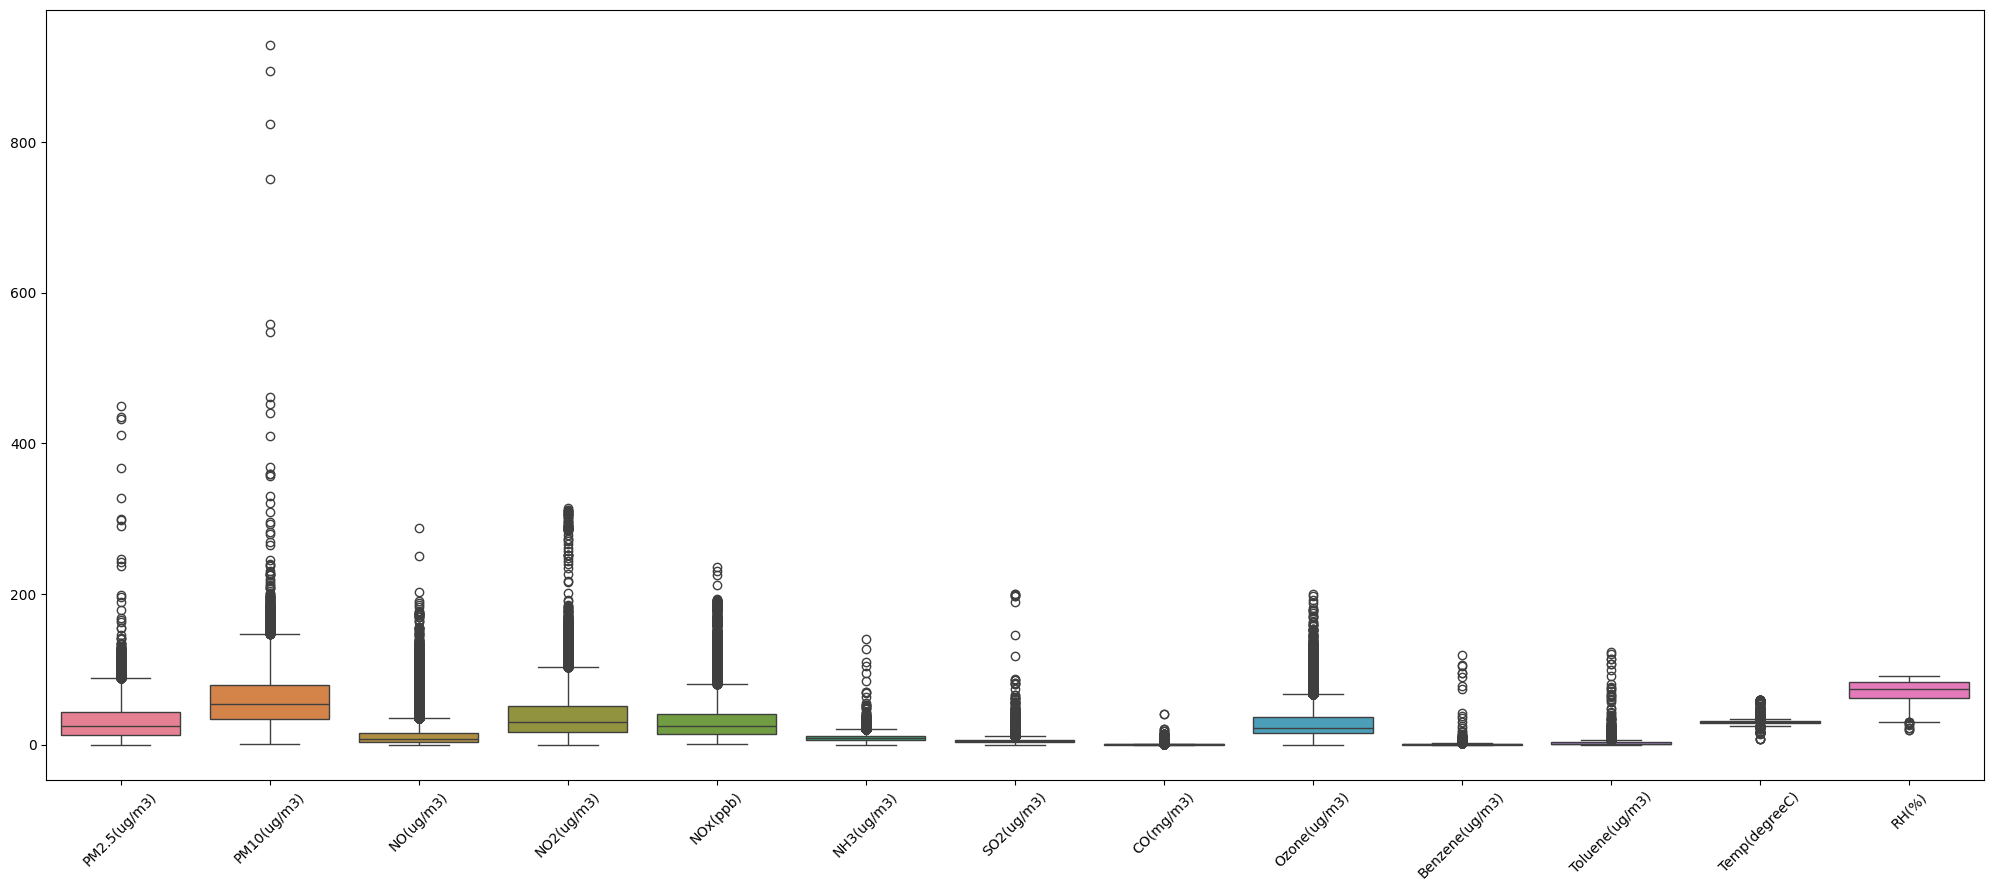

In [66]:
plt.subplots(figsize= (25, 10))
sns.boxplot(data = dfc)
plt.xticks(rotation = 45)


Calculating the InterQuantilesRange of Each columns

In [67]:
Q25 = dfc.quantile(0.25)
Q75 = dfc.quantile(0.75)
IQR = Q75 - Q25
IQR

PM2.5(ug/m3)      29.92
PM10(ug/m3)       45.00
NO(ug/m3)         12.48
NO2(ug/m3)        34.33
NOx(ppb)          26.82
NH3(ug/m3)         5.90
SO2(ug/m3)         3.37
CO(mg/m3)          0.43
Ozone(ug/m3)      20.35
Benzene(ug/m3)     0.77
Toluene(ug/m3)     2.22
Temp(degreeC)      2.29
RH(%)             21.50
dtype: float64

Removing Outliers 

In [68]:
dfc_outliers_removed = dfc[~((dfc < (Q25 - 1.5 * IQR)) | (dfc > (Q75 + 1.5 * IQR))).any(axis=1)]
len(dfc) - len(dfc_outliers_removed)

14462

In [69]:
#scaler = StandardScaler()
#df_scaled2 = scaler.fit_transform(dfc)

#scaler = MinMaxScaler()
#dfc_scaled = scaler.fit_transform(dfc_outliers_removed)

Checking the normal distribution of the data

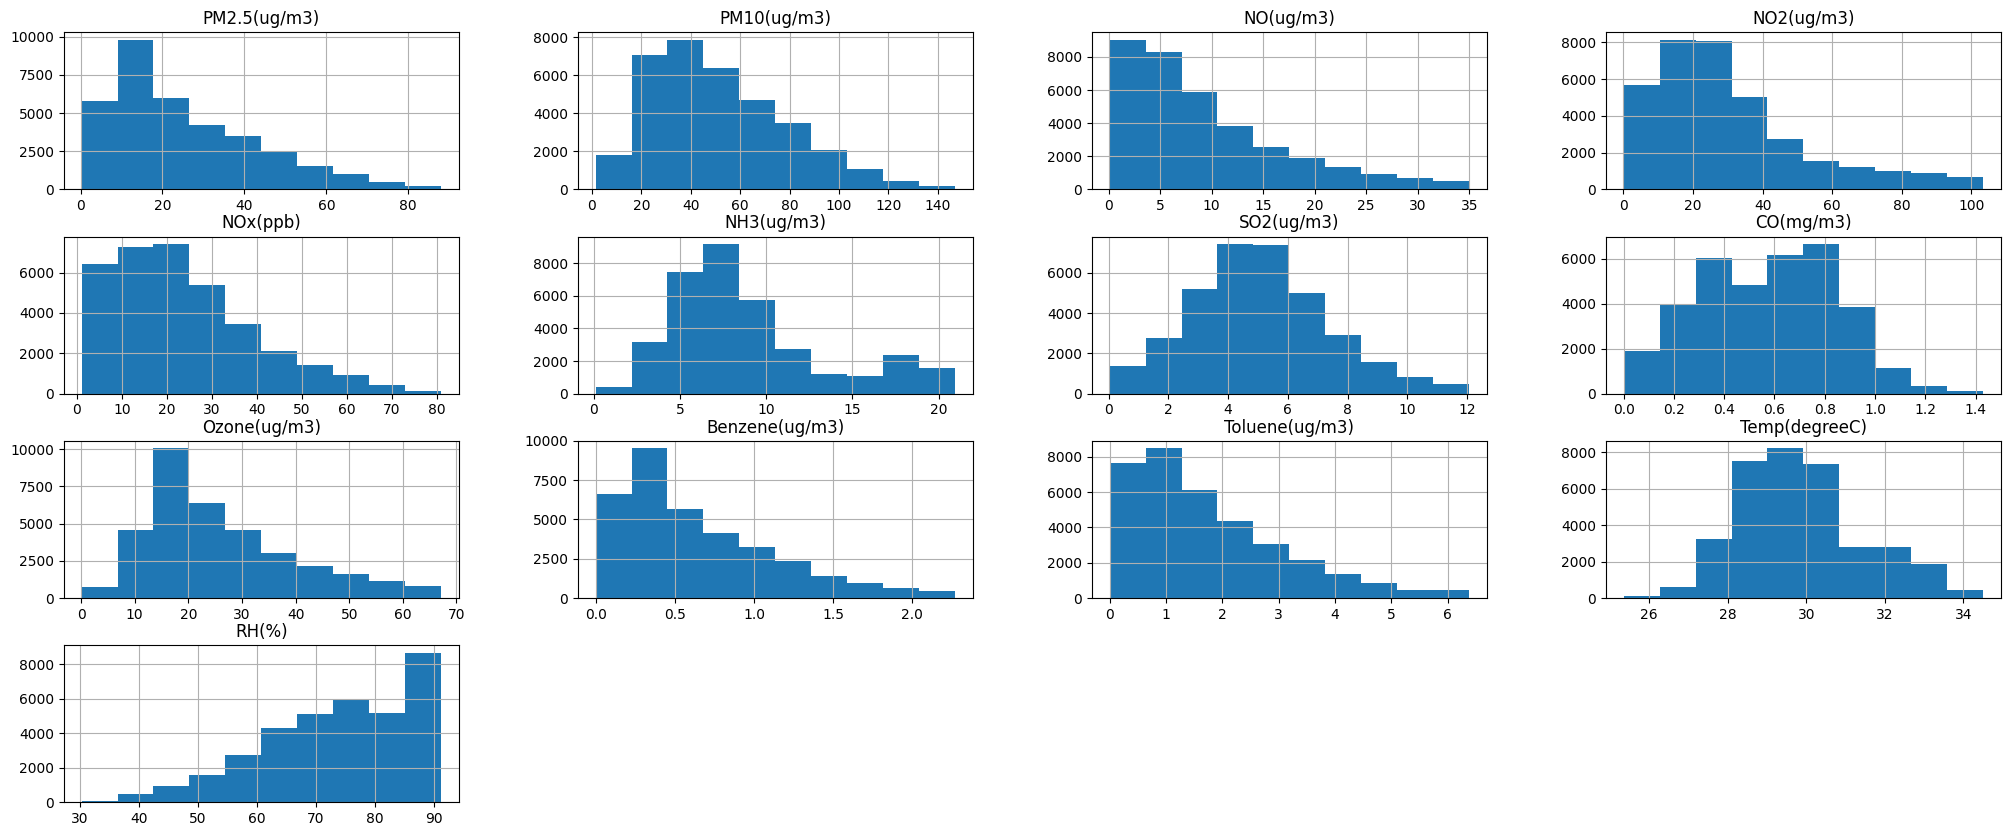

In [70]:
dfc_outliers_removed.hist(figsize=(25, 10))
plt.show()

Upper limit for the Outlier

In [71]:
#dfc_scaled_df = pd.DataFrame(dfc_outliers_removed, columns=dfc_outliers_removed.columns)
corrolation = dfc_outliers_removed.corr()

Lower Limit of the Outlier 

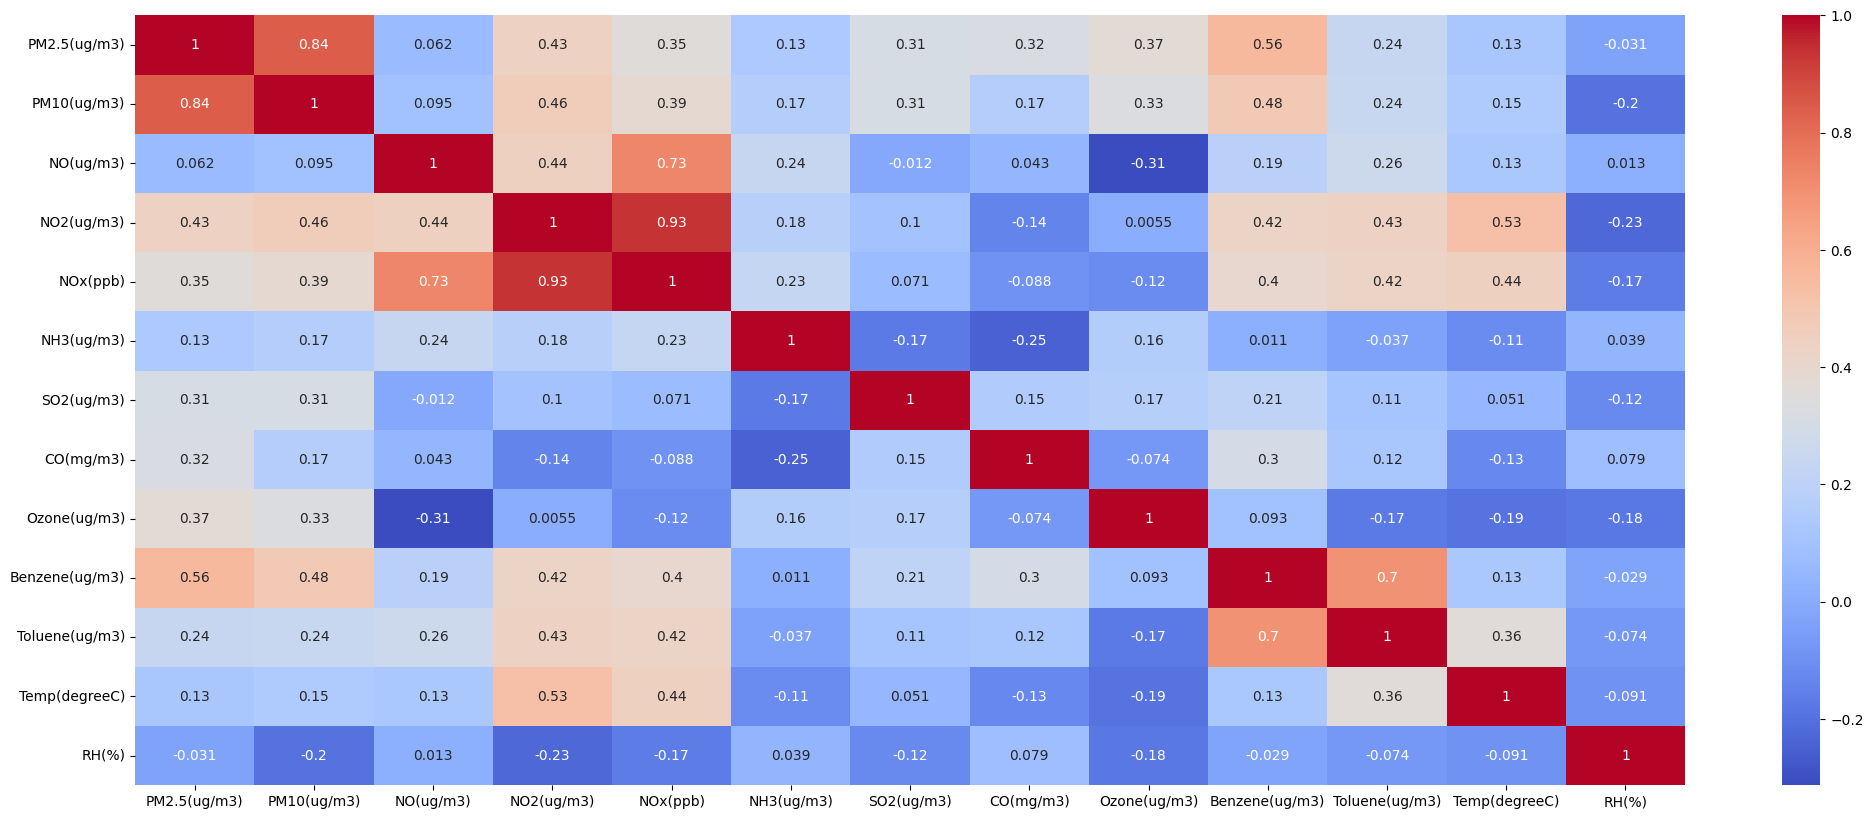

In [72]:
plt.figure(figsize=(25, 10))
sns.heatmap(corrolation, annot= True, cmap="coolwarm")
plt.show()

Function to calculate Aire Quality Index

In [73]:
def calculate_aqi(C, BP_HI, BP_LO, I_HI, I_LO):
    if C is None or pd.isnull(C):
        return None
    return ((I_HI - I_LO) / (BP_HI - BP_LO)) * (C - BP_LO) + I_LO

Breakpoints for relevant pollutants

In [74]:
pollutant_breakpoints = {
    'PM2.5(ug/m3)': [(0, 12.0, 0, 50), (12.1, 35.4, 51, 100), (35.5, 55.4, 101, 150), (55.5, 150.4, 151, 200), (150.5, 250.4, 201, 300), (250.5, 500.4, 301, 500)],
    'PM10(ug/m3)': [(0, 54, 0, 50), (55, 154, 51, 100), (155, 254, 101, 150), (255, 354, 151, 200), (355, 424, 201, 300), (425, 604, 301, 500)],
    'Ozone(ug/m3)': [(0, 54, 0, 50), (55, 70, 51, 100), (71, 85, 101, 150), (86, 105, 151, 200), (106, 200, 201, 300)],
    'NO(ug/m3)': [(0, 53, 0, 50), (54, 100, 51, 100), (101, 360, 101, 150), (361, 649, 151, 200), (650, 1249, 201, 300), (1250, 2049, 301, 500)],
    'NO2(ug/m3)': [(0, 53, 0, 50), (54, 100, 51, 100), (101, 360, 101, 150), (361, 649, 151, 200), (650, 1249, 201, 300), (1250, 2049, 301, 500)],
    'NOx(ppb)': [(0, 100, 0, 50), (101, 200, 51, 100), (201, 300, 101, 150), (301, 400, 151, 200), (401, 500, 201, 300)],
    'NH3(ug/m3)': [(0, 200, 0, 50), (201, 400, 51, 100), (401, 800, 101, 150), (801, 1200, 151, 200), (1201, 1800, 201, 300)],
    'Benzene(ug/m3)': [(0, 3, 0, 50), (3.1, 9, 51, 100), (9.1, 20, 101, 150), (20.1, 50, 151, 200), (50.1, 100, 201, 300)],
    'Toluene(ug/m3)': [(0, 1000, 0, 50), (1001, 2000, 51, 100), (2001, 3000, 101, 150), (3001, 4000, 151, 200), (4001, 5000, 201, 300)]
}

Calculating the AQI of Our Data

In [75]:
def get_aqi_for_pollutant(pollutant, concentration):
    breakpoints = pollutant_breakpoints.get(pollutant, None)
    if breakpoints:
        for BP_LO, BP_HI, I_LO, I_HI in breakpoints:
            if BP_LO <= concentration <= BP_HI:
                return calculate_aqi(concentration, BP_HI, BP_LO, I_HI, I_LO)
    return None

Generating the AQI Dataframe

In [76]:
aqi_data = pd.DataFrame()

aqi_data['AQI_PM2.5'] = dfc_outliers_removed['PM2.5(ug/m3)'].apply(lambda x: get_aqi_for_pollutant('PM2.5(ug/m3)', x))
aqi_data['AQI_PM10'] = dfc_outliers_removed['PM10(ug/m3)'].apply(lambda x: get_aqi_for_pollutant('PM10(ug/m3)', x))
aqi_data['AQI_Ozone'] = dfc_outliers_removed['Ozone(ug/m3)'].apply(lambda x: get_aqi_for_pollutant('Ozone(ug/m3)', x))
aqi_data['AQI_NO'] = dfc_outliers_removed['NO(ug/m3)'].apply(lambda x: get_aqi_for_pollutant('NO(ug/m3)', x))
aqi_data['AQI_NO2'] = dfc_outliers_removed['NO2(ug/m3)'].apply(lambda x: get_aqi_for_pollutant('NO2(ug/m3)', x))
aqi_data['AQI_NOx'] = dfc_outliers_removed['NOx(ppb)'].apply(lambda x: get_aqi_for_pollutant('NOx(ppb)', x))
aqi_data['AQI_NH3'] = dfc_outliers_removed['NH3(ug/m3)'].apply(lambda x: get_aqi_for_pollutant('NH3(ug/m3)', x))
aqi_data['AQI_Benzene'] = dfc_outliers_removed['Benzene(ug/m3)'].apply(lambda x: get_aqi_for_pollutant('Benzene(ug/m3)', x))
aqi_data['AQI_Toluene'] = dfc_outliers_removed['Toluene(ug/m3)'].apply(lambda x: get_aqi_for_pollutant('Toluene(ug/m3)', x))

aqi_data

,AQI_PM2.5,AQI_PM10,AQI_Ozone,AQI_NO,AQI_NO2,AQI_NOx,AQI_NH3,AQI_Benzene,AQI_Toluene
0,44.458333,36.111111,13.425926,16.669811,36.981132,16.165,1.7675,16.666667,0.2315
1,68.665236,46.296296,9.722222,14.528302,41.132075,16.390,1.5875,10.000000,0.2250
2,57.624464,53.227273,6.111111,22.924528,42.566038,20.060,1.6625,12.833333,0.2665
5,63.407725,52.361111,11.296296,13.679245,41.698113,16.165,1.9450,11.666667,0.2650
6,50.000000,54.959596,16.203704,9.839623,38.679245,13.915,2.0325,11.666667,0.2515
...,...,...,...,...,...,...,...,...,...
49437,131.163317,56.568182,12.472222,6.962264,51.553913,17.500,1.9325,31.333333,0.2350
49438,144.090452,58.547980,11.388889,10.405660,58.616304,20.760,2.0750,25.833333,0.2575
49440,122.545226,63.621212,9.814815,3.207547,32.971698,10.675,1.8125,28.666667,0.2060
49441,91.272532,52.979798,8.333333,3.254717,25.924528,8.700,1.8750,25.000000,0.2525


Calculate overall AQI as the maximum AQI for each row

In [77]:
aqi_data['Overall_AQI'] = aqi_data[['AQI_PM2.5', 'AQI_PM10', 'AQI_Ozone', 'AQI_NO', 'AQI_NO2', 'AQI_NOx', 'AQI_NH3', 'AQI_Benzene', 'AQI_Toluene']].max(axis=1)

Categorize AQI

In [78]:
def categorize_aqi(aqi):
    if aqi <= 50:
        return 'Good'
    elif 51 <= aqi <= 100:
        return 'Moderate'
    elif 101 <= aqi <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif 151 <= aqi <= 200:
        return 'Unhealthy'
    elif 201 <= aqi <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

Apply categorization

In [79]:
dfc_outliers_removed['Overall_AQI'] = aqi_data['Overall_AQI']
dfc_outliers_removed

C:\Users\USER\AppData\Local\Temp\ipykernel_6948\1986609858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc_outliers_removed['Overall_AQI'] = aqi_data['Overall_AQI']


,PM2.5(ug/m3),PM10(ug/m3),NO(ug/m3),NO2(ug/m3),NOx(ppb),NH3(ug/m3),SO2(ug/m3),CO(mg/m3),Ozone(ug/m3),Benzene(ug/m3),Toluene(ug/m3),Temp(degreeC),RH(%),Overall_AQI
0,10.67,39.00,17.67,39.20,32.33,7.07,6.60,0.48,14.50,1.00,4.63,33.43,71.67,44.458333
1,20.50,50.00,15.40,43.60,32.78,6.35,6.38,0.47,10.50,0.60,4.50,33.57,63.50,68.665236
2,15.25,59.50,24.30,45.12,40.12,6.65,6.53,0.51,6.60,0.77,5.33,33.55,63.75,57.624464
5,18.00,57.75,14.50,44.20,32.33,7.78,6.07,0.45,12.20,0.70,5.30,33.23,63.75,63.407725
6,12.00,63.00,10.43,41.00,27.83,8.13,6.20,0.41,17.50,0.70,5.03,33.27,64.00,54.959596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49437,47.75,66.25,7.38,54.52,35.00,7.73,4.95,1.09,13.47,1.88,4.70,30.65,69.75,131.163317
49438,53.00,70.25,11.03,61.15,41.52,8.30,3.68,1.16,12.30,1.55,5.15,30.57,72.75,144.090452
49440,44.25,80.50,3.40,34.95,21.35,7.25,1.62,0.85,10.60,1.72,4.12,30.68,82.50,122.545226
49441,31.25,59.00,3.45,27.48,17.40,7.50,1.82,0.83,9.00,1.50,5.05,30.60,86.00,91.272532


Categorization 

In [80]:
dfc_outliers_removed['AQI_Category'] = dfc_outliers_removed['Overall_AQI'].apply(categorize_aqi)
dfc_outliers_removed

C:\Users\USER\AppData\Local\Temp\ipykernel_6948\1203750106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc_outliers_removed['AQI_Category'] = dfc_outliers_removed['Overall_AQI'].apply(categorize_aqi)


,PM2.5(ug/m3),PM10(ug/m3),NO(ug/m3),NO2(ug/m3),NOx(ppb),NH3(ug/m3),SO2(ug/m3),CO(mg/m3),Ozone(ug/m3),Benzene(ug/m3),Toluene(ug/m3),Temp(degreeC),RH(%),Overall_AQI,AQI_Category
0,10.67,39.00,17.67,39.20,32.33,7.07,6.60,0.48,14.50,1.00,4.63,33.43,71.67,44.458333,Good
1,20.50,50.00,15.40,43.60,32.78,6.35,6.38,0.47,10.50,0.60,4.50,33.57,63.50,68.665236,Moderate
2,15.25,59.50,24.30,45.12,40.12,6.65,6.53,0.51,6.60,0.77,5.33,33.55,63.75,57.624464,Moderate
5,18.00,57.75,14.50,44.20,32.33,7.78,6.07,0.45,12.20,0.70,5.30,33.23,63.75,63.407725,Moderate
6,12.00,63.00,10.43,41.00,27.83,8.13,6.20,0.41,17.50,0.70,5.03,33.27,64.00,54.959596,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49437,47.75,66.25,7.38,54.52,35.00,7.73,4.95,1.09,13.47,1.88,4.70,30.65,69.75,131.163317,Unhealthy for Sensitive Groups
49438,53.00,70.25,11.03,61.15,41.52,8.30,3.68,1.16,12.30,1.55,5.15,30.57,72.75,144.090452,Unhealthy for Sensitive Groups
49440,44.25,80.50,3.40,34.95,21.35,7.25,1.62,0.85,10.60,1.72,4.12,30.68,82.50,122.545226,Unhealthy for Sensitive Groups
49441,31.25,59.00,3.45,27.48,17.40,7.50,1.82,0.83,9.00,1.50,5.05,30.60,86.00,91.272532,Moderate


Converting the AQI_Category to Number

In [81]:
def convert_to_int(AIQ_Category):
    AIQ_dic = {
        'Good': 1, 'Moderate': 2, 'Unhealthy for Sensitive Groups': 3, 'Unhealthy': 4, 'Very Unhealthy': 5, 'Very Unhealthy': 6, 'Hazardous': 7
    }
    return AIQ_dic[AIQ_Category]

In [82]:
dfc_outliers_removed["AQI_Category"] = dfc_outliers_removed["AQI_Category"].apply(lambda x : convert_to_int(x))

C:\Users\USER\AppData\Local\Temp\ipykernel_6948\507887499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc_outliers_removed["AQI_Category"] = dfc_outliers_removed["AQI_Category"].apply(lambda x : convert_to_int(x))


In [83]:
dfc_outliers_removed

,PM2.5(ug/m3),PM10(ug/m3),NO(ug/m3),NO2(ug/m3),NOx(ppb),NH3(ug/m3),SO2(ug/m3),CO(mg/m3),Ozone(ug/m3),Benzene(ug/m3),Toluene(ug/m3),Temp(degreeC),RH(%),Overall_AQI,AQI_Category
0,10.67,39.00,17.67,39.20,32.33,7.07,6.60,0.48,14.50,1.00,4.63,33.43,71.67,44.458333,1
1,20.50,50.00,15.40,43.60,32.78,6.35,6.38,0.47,10.50,0.60,4.50,33.57,63.50,68.665236,2
2,15.25,59.50,24.30,45.12,40.12,6.65,6.53,0.51,6.60,0.77,5.33,33.55,63.75,57.624464,2
5,18.00,57.75,14.50,44.20,32.33,7.78,6.07,0.45,12.20,0.70,5.30,33.23,63.75,63.407725,2
6,12.00,63.00,10.43,41.00,27.83,8.13,6.20,0.41,17.50,0.70,5.03,33.27,64.00,54.959596,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49437,47.75,66.25,7.38,54.52,35.00,7.73,4.95,1.09,13.47,1.88,4.70,30.65,69.75,131.163317,3
49438,53.00,70.25,11.03,61.15,41.52,8.30,3.68,1.16,12.30,1.55,5.15,30.57,72.75,144.090452,3
49440,44.25,80.50,3.40,34.95,21.35,7.25,1.62,0.85,10.60,1.72,4.12,30.68,82.50,122.545226,3
49441,31.25,59.00,3.45,27.48,17.40,7.50,1.82,0.83,9.00,1.50,5.05,30.60,86.00,91.272532,2


In [84]:
# Prepare features (X) and labels (y) for machine learning
X = dfc_outliers_removed.drop(columns=['Overall_AQI', "AQI_Category"])

# For regression (predicting AQI value):
y = dfc_outliers_removed["AQI_Category"]

Train-test split

In [85]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Dictionary to store models and their names

In [86]:
linear_Regression = LinearRegression()
linear_Regression.fit(X_train, y_train)

decision_Tree = DecisionTreeRegressor()
decision_Tree.fit(X_train, y_train)

random_Forest = RandomForestRegressor()
random_Forest.fit(X_train, y_train)

svr = SVR()
svr.fit(X_train, y_train)

gradient_Boosting = GradientBoostingRegressor()
gradient_Boosting.fit(X_train, y_train)

GradientBoostingRegressor()

In [87]:
models = {
    'Linear_Regression': linear_Regression,
    'Decision_Tree': decision_Tree,
    'Random_Forest': random_Forest,
    'SVR': svr,
    'Gradient_Boosting': gradient_Boosting
}

To store results for comparison

In [88]:
model_performance = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # result = pd.DataFrame({"y_pred":y_pred, "y_test":y_test})
    #print(f"{model_name} \n{result}")
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the R2 score for comparison
    model_performance[model_name] = r2
    
    # Output the performance metrics
    print(f"{model_name} Performance:")
    print(f"Mean Squared Error: {mse}")
    print(f"R2 Score: {r2}")
    print("-" * 30)

    #create pickle
    pickle.dump(model, open(f"{model_name}.pkl", "wb"))

Linear_Regression Performance:
Mean Squared Error: 0.10098313734266245
R2 Score: 0.8626390007899947
------------------------------
Decision_Tree Performance:
Mean Squared Error: 0.0
R2 Score: 1.0
------------------------------
Random_Forest Performance:
Mean Squared Error: 9.732742603973134e-06
R2 Score: 0.9999867611634544
------------------------------
SVR Performance:
Mean Squared Error: 0.08203859905922065
R2 Score: 0.8884080626023215
------------------------------
Gradient_Boosting Performance:
Mean Squared Error: 0.00010118088490928187
R2 Score: 0.9998623700172343
------------------------------


Data Visualization

Bar plot comparing R2 scores of different models

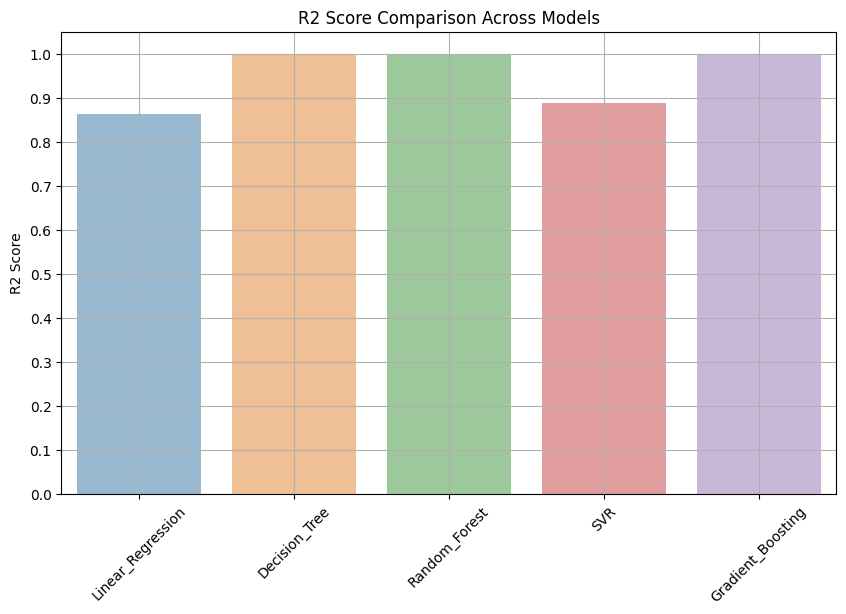

In [89]:

plt.figure(figsize=(10, 6)) 
sns.barplot(x=list(model_performance.keys()), y=list(model_performance.values()), hue=list(models.keys()), alpha=0.5) 
plt.ylabel('R2 Score') 
plt.title('R2 Score Comparison Across Models') 
plt.xticks(rotation=45) 

# Access the current axes and set the y-axis locator 
ax = plt.gca() 
ax.yaxis.set_major_locator(MultipleLocator(0.1)) 

# Adding grid lines 
ax.grid(True)

plt.savefig('R2 Score Comparison Across Models.png')
plt.show()